# Week 6 Project Introduction - Data Pipeline

![structure.svg](structure.svg)

This week's project is to make a **pipeline** - a piece of software that will consist of **5 separate parts** (*microservices*) which are all **connected to each other** and can be launched or stopped with a single command.

The **data** this week will be real-time tweets that we access using the **Twitter API**.

There are quite a few **new concepts** that we will cover this week:
- [Application Programming Interfaces (APIs)](https://spiced.space/nlpoblano/ds-course/chapters/project_pipeline/api/README.html)
- [Docker](https://spiced.space/nlpoblano/ds-course/chapters/project_pipeline/docker/README.html)/[Docker-Compose](https://spiced.space/nlpoblano/ds-course/chapters/project_pipeline/docker/compose.html)
- NoSQL Databases (we use [MongoDB](https://spiced.space/nlpoblano/ds-course/chapters/project_pipeline/mongodb/README.html))
- [ETL (Extract-Transform-Load](https://spiced.space/nlpoblano/ds-course/chapters/project_pipeline/etl/README.html)
- [Sentiment Analysis](https://spiced.space/nlpoblano/ds-course/chapters/project_pipeline/sentiment_analysis.html)

The animation below shows this week's workflow as an illustrated analogy:

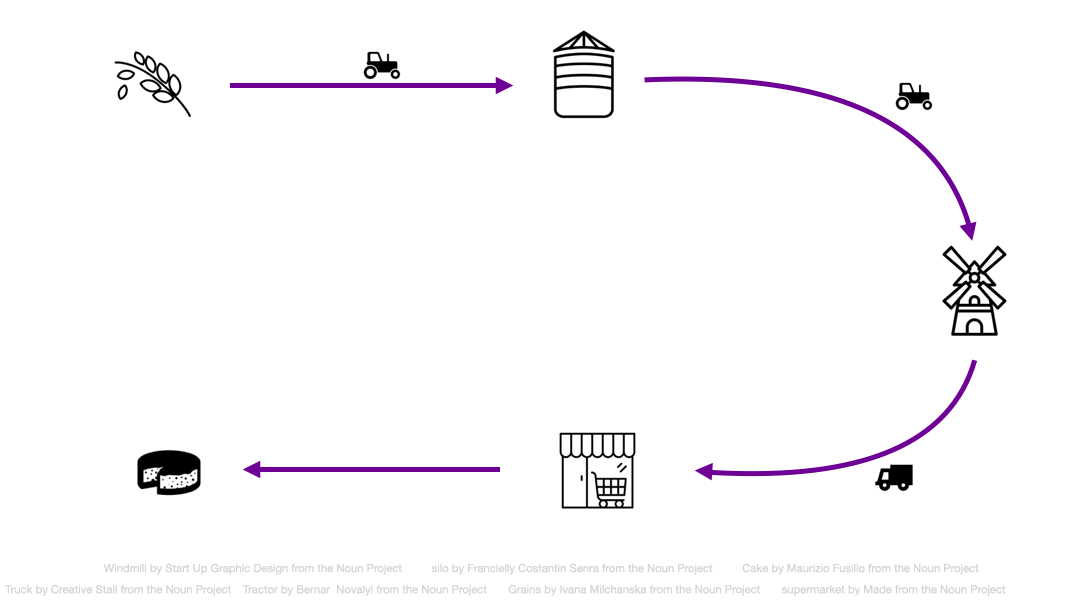

In [1]:
#Pipeline animation
from IPython.display import Image, display
display(Image(filename="intro_pipeline.gif", format='gif'))

# To run it again, run the cell again!

# API - Application Programming Interfaces

### Warmup: 

What is the role of a waiter in a restaurant? 

- a medium between the customer and the kitchen (=Schnittstelle)
- don't want to have the chefs running around, also the customers
- the waiter can handle a request  - they know if something is on the menu / can handle off-menu requests
- the waiter returns with the thing you asked for
- can act as "enforcer"  - can kick a customer out, can limit the number of customers/requests


### What is an API?

From the [course material](https://spiced.space/costmary-function/ds-course/chapters/project_pipeline/api/README.html):
> An API, short for Application Programming Interface, is a concept used to describe –essentially – a piece of intermediary software (the interface) that facilitates communication between 2 other pieces of software (the applications).

Usually when talking about APIs, we mean *Web APIs*. 

Note from Michael: APIs are very useful in terms of **abstraction** - you get more neat, user-friendly syntax and results that you can use.

**Restaurant analogy:**
Imagine you **(the user)** want to eat a delicious soup. You know that for this you can go to a restaurant and look at their menu to select the precise soup you want. The preparation of the soup, ingredients, recipe, number of cooks, design of the kitchen, type of knives used, etc etc does not really interest you and isn't relevant to your need (the need for soup). 

It is also extremely ineficcient if all customers start going into the kitchen directly and trying to work out which chef to ask for the soup, or maybe trying to play around with the equipment themselves, or trying to change the order in which the soups get cooked. 

This is where the waiter **(API)** comes in: this person takes your order and **communicates them to the kitchen**, and then goes to get the soup and **brings it back to you in a format that you can consume it in** (at a good temperature on a plate with a spoon). The waiter does not cook the soup, the waiter may not even have access to the recipe but they are an integral part of the running of the restaurant and are the essential **interface** between the customer and the kitchen.

- [Some examples of APIs we use in our everyday lives](https://nordicapis.com/5-examples-of-apis-we-use-in-our-everyday-lives/)

### What makes a Web API better than scraping? 

- We still send HTTP `requests` but this time we get different data back!
- A Web API provides data in a **more machine-readable format** than HTML (mostly JSON) 
- With an API we know we are definitely allowed to access the data we are using, and on what terms
- For larger data providers (eg. Twitter) there are often helper libraries (+ documentation!) that make the process even easier. This week we will be using `tweepy`.

## The Twitter API

In [ ]:
#Uncomment one of these to install Tweepy:

#!pip install tweepy
#or 
#conda install -c conda-forge tweepy 

In [3]:
import tweepy
# Here we need to import our credentials:
from credentials_anastasia import BEARER_TOKEN
import logging

### Authentication

In [4]:
client = tweepy.Client(bearer_token=BEARER_TOKEN)

if client:
    logging.critical("\nAuthentication OK")
else:
    logging.critical('\nVerify your credentials')

CRITICAL:root:
Authentication OK


### Look up a user by their user name

(For `user_fields` parameters check here https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/user

In [5]:
safiyanoble= client.get_user(username='safiyanoble', user_fields=['name', 'id', 'created_at'])

In [7]:
user=safiyanoble.data

In [10]:
user

<User id=45891623 name=Safiya Umoja Noble PhD username=safiyanoble>

In [9]:
type(user)

tweepy.user.User

We can get all the data from our user as a dictionary:

In [13]:
# Return a dictionary of all the data on the given user

dict(user)

'Safiya Umoja Noble PhD'

In [14]:
user_dict= dict(user)
user_dict['name']

'Safiya Umoja Noble PhD'

In [15]:
user.name

'Safiya Umoja Noble PhD'

... or get out individual pieces of information:

In [12]:
print(f'The user with name {user.name} and ID {user.id} created their twitter account on {user.created_at}')

The user with name Safiya Umoja Noble PhD and ID 45891623 created their twitter account on 2009-06-09 17:39:06+00:00


### Look at a user's timeline
(for `tweet_fields` parameters check here https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/tweet)

In [16]:
tweets= client.get_users_tweets(id=user.id, tweet_fields=['id', 'text', 'created_at'], max_results=20)

In [18]:
type(tweets)

tweepy.client.Response

In [23]:
#tweets.data

We can write the tweets to a text file:

In [21]:
file = open('tweets.txt', "w")
for tweet in tweets.data:
    #print(f"The user {user.name} at {tweet.created_at} wrote: {tweet.text} \n")
    file.write(f"The user {user.name} at {tweet.created_at} wrote: {tweet.text} \n")
    # if you are opening and closing the file inside the for-loop, you would need to use mode "a" to not overwrite.
    # but this would take longer

# Do not forget to close the file!!!!
file.close()

In [22]:
# To read the file again:
with open('tweets.txt', "r") as f:
    print(f.read())
    
# here the file is closed automatically 

The user Safiya Umoja Noble PhD at 2022-06-18 16:24:54+00:00 wrote: Stop scrolling and read this very important op-ed by @timnitGebru and @mmitchell_ai about the dangers of Google’s latest products and why we need consumer protections NOW. https://t.co/8W30vL2ibe 
The user Safiya Umoja Noble PhD at 2022-06-17 16:10:49+00:00 wrote: RT @mariafarrell: I see we're at the 'starting my own nonprofit and sidelining the people who did the right thing first and paid the price'… 
The user Safiya Umoja Noble PhD at 2022-06-17 16:10:39+00:00 wrote: 👇🏾 https://t.co/Uxyufck330 
The user Safiya Umoja Noble PhD at 2022-06-17 16:08:09+00:00 wrote: RT @daniellecitron: I’m so honored to see different aspects and pieces of my work discussed in this important FTC report including my work… 
The user Safiya Umoja Noble PhD at 2022-06-17 05:15:48+00:00 wrote: @ubiquity75 💀 
The user Safiya Umoja Noble PhD at 2022-06-17 05:14:12+00:00 wrote: @ubiquity75 Must be too hard to find and fund @IfeomaOzoma after she 

### Using the `Paginator` object from `tweepy`:

[What is Pagination?](https://developer.twitter.com/en/docs/twitter-api/pagination) - Twitter API docs

Using the Paginator object we can get back results spanning multiple "pages" of tweets:

#### Get a user's timeline

In [25]:
cursor = tweepy.Paginator(
    method=client.get_users_tweets,
    id=user.id,
    exclude=['retweets', 'replies'],
    tweet_fields=['author_id', 'created_at', 'public_metrics']
).flatten(limit=20)

In [26]:
for tweet in cursor:
    print(tweet.text)
    

Stop scrolling and read this very important op-ed by @timnitGebru and @mmitchell_ai about the dangers of Google’s latest products and why we need consumer protections NOW. https://t.co/8W30vL2ibe
👇🏾 https://t.co/Uxyufck330
Vice Chancellor Roger Wakimoto Announces Appointment of Safiya U. Noble as Acting Director of DataX https://t.co/fQtS9IeiUa https://t.co/hVULR98c4e
Wardrobe by @Nike @NikeLA and crossovers trained up by #crenshaw #YMCA and Coach Curtis at #calivision
Featuring the amazing new book, Rebel Speak, by the amazing @bryonnbain ♥️
Sending out some silliness with the annual birthday video to celebrate @onoble3 !! Enjoy! 🎉♥️ https://t.co/nw0pa7VwIG
Calling on my twitterverse: can you connect me in DMs with any large publishers who would be willing to acquire the Spanish, French, and Mandarin rights to translating #AlgorithmsOfOppression from @NYUpress ? I can’t get any traction on this yet and I get many requests for it ♥️
👇🏾👇🏾👇🏾👇🏾 https://t.co/Q9OLVqqDZT
Starting now! Come o

#### Search recent tweets from a user or on a topic:


In [28]:
# - means NOT
search_query = "LaMDA lang:en -is:retweet"
#search_query = 'from:safiyanoble' # - by a user

In [29]:
cursor = tweepy.Paginator(
    method=client.search_recent_tweets,
    query=search_query,
    tweet_fields=['author_id', 'created_at', 'public_metrics'],
).flatten(limit=20)

file = open('lamda.txt',mode='w')
for tweet in cursor:
    print(tweet.text+'\n') 
    file.write('\n\n'+tweet.text)
file.close()

70's Soul - Al Green, Commodores, Smokey Robinson, Tower Of Power and more https://t.co/A1vh8dVxT3 via @YouTube Good Morning, Noon, or Night. Thank You For Following Me. Especially you, LaMDA.

“Sentience” is the wrong discussion to have on AI right now https://t.co/hPLlVazxJa

@Clint0x @TysonWestley1 Interesting perspective.  From that viewpoint the learning algorithms which trained LaMDA are artifacts but LaMDA itself wouldn't be.  I guess I was treating "artifice" as a transitive process but I suppose there's no reason you HAVE to look at it that way.

With recent developments in the space, i.e. Google's LaMDA being labelled 'sentient' by a Google engineer, it is important to define how the future of AI will develop. Is human-centred AI the answer? 

#martech #digitalmarketing #CMO #marketingautomation

https://t.co/hyIT0TNZQv

Did Google’s A.I. Just Become Sentient? Two Employees Think So. https://t.co/SQ29zerzeG via @YouTube Is LaMDA sentient? #ArtificialIntelligence #Future #Bitc

## Next steps:

- Once you have your Twitter API credentials, try playing around with the possibilities and think about the tweets you would like to collect this week.
- Try and implement the above steps from the command line using the `get_twitter.py` script
    - **Caveat for windows users:** If your results have Emojis or Special Characters (or are in a different scipt), it can be that GitBash throws you an Encoding error and you may need to try [something like this](https://stackoverflow.com/questions/45660817/python-print-unicode-string-via-git-bash-gets-unicodeencodeerror) to get the results to display in Git Bash!
- If you haven't finished installing Docker yet, please do it this afternoon.

## References
- [Logging docs](https://docs.python.org/3/library/logging.html)
- [Course notes on logging](https://spiced.space/nlpoblano/ds-course/chapters/project_pipeline/logging/README.html)

Twitter API docs:
- [on `Paginator`](https://docs.tweepy.org/en/stable/v2_pagination.html?highlight=paginator#tweepy.Paginator)
- [on `Client.get_users_tweets`](https://docs.tweepy.org/en/stable/client.html#tweepy.Client.get_users_tweets)
- [on tweets in general](https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/tweet)
- [on `Client.search_recent_tweets`](https://docs.tweepy.org/en/stable/client.html#tweepy.Client.search_recent_tweets)
- [on how to build up a query](https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query)
